In [1]:
from bs4 import BeautifulSoup as bs
import requests
import json
import numpy as np
import pandas as pd

In [4]:
def page(soup):
    art = soup.find_all('div',class_ = 'image_container')
    bookurl = []
   
    for i in art:
        bookurl.append('https://books.toscrape.com/catalogue/'+i.find('a')['href'])
    return bookurl

In [5]:
page_url = []

for i in range(1,51):
    pagehtml = bs(requests.get('https://books.toscrape.com/catalogue/page-'+str(i)+'.html').text)
    page_url+=page(pagehtml)
#     print(page(pagehtml))

page_url

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

In [6]:
booklist = []
for i in range(len(page_url)):
    book1 = bs(requests.get(page_url[i]).text)
    booklist += [{'bookUPC' : book1.find_all('td')[0].text,
         'bookImg' : book1.find('img')['src'],
         'bookName' : book1.find('h1').text,
         'bookGenre' : book1.find_all('a')[3].text,
         'bookType' : book1.find_all('td')[1].text,
         'bookPrice' : book1.find_all('td')[2].text,
         'bookPriceTax' : book1.find_all('td')[3].text,
         'bookTax' : book1.find_all('td')[4].text,
         'bookAvialability' : book1.find_all('td')[5].text,
         'bookreview' : book1.find_all('td')[6].text,
         'bookrating' : book1.find('p',attrs={'class':'star-rating'})['class'][1]}]

In [7]:
booklist

[{'bookUPC': 'a897fe39b1053632',
  'bookImg': '../../media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg',
  'bookName': 'A Light in the Attic',
  'bookGenre': 'Poetry',
  'bookType': 'Books',
  'bookPrice': 'Â£51.77',
  'bookPriceTax': 'Â£51.77',
  'bookTax': 'Â£0.00',
  'bookAvialability': 'In stock (22 available)',
  'bookreview': '0',
  'bookrating': 'Three'},
 {'bookUPC': '90fa61229261140a',
  'bookImg': '../../media/cache/08/e9/08e94f3731d7d6b760dfbfbc02ca5c62.jpg',
  'bookName': 'Tipping the Velvet',
  'bookGenre': 'Historical Fiction',
  'bookType': 'Books',
  'bookPrice': 'Â£53.74',
  'bookPriceTax': 'Â£53.74',
  'bookTax': 'Â£0.00',
  'bookAvialability': 'In stock (20 available)',
  'bookreview': '0',
  'bookrating': 'One'},
 {'bookUPC': '6957f44c3847a760',
  'bookImg': '../../media/cache/ee/cf/eecfe998905e455df12064dba399c075.jpg',
  'bookName': 'Soumission',
  'bookGenre': 'Fiction',
  'bookType': 'Books',
  'bookPrice': 'Â£50.10',
  'bookPriceTax': 'Â£50.10',
  'bookTax

In [20]:
import json 
with open('srapBookweb','w') as f:
    f.write(json.dumps(booklist))
f.close()

In [142]:
df = pd.read_json('srapBookweb')

df

,bookUPC,bookImg,bookName,bookGenre,bookType,bookPrice,bookPriceTax,bookTax,bookAvialability,bookreview,bookrating
0,a897fe39b1053632,../../media/cache/fe/72/fe72f0532301ec28892ae7...,A Light in the Attic,Poetry,Books,Â£51.77,Â£51.77,Â£0.00,In stock (22 available),0,Three
1,90fa61229261140a,../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,Tipping the Velvet,Historical Fiction,Books,Â£53.74,Â£53.74,Â£0.00,In stock (20 available),0,One
2,6957f44c3847a760,../../media/cache/ee/cf/eecfe998905e455df12064...,Soumission,Fiction,Books,Â£50.10,Â£50.10,Â£0.00,In stock (20 available),0,One
3,e00eb4fd7b871a48,../../media/cache/c0/59/c05972805aa7201171b8fc...,Sharp Objects,Mystery,Books,Â£47.82,Â£47.82,Â£0.00,In stock (20 available),0,Four
4,4165285e1663650f,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,Sapiens: A Brief History of Humankind,History,Books,Â£54.23,Â£54.23,Â£0.00,In stock (20 available),0,Five
...,...,...,...,...,...,...,...,...,...,...,...
995,cd2a2a70dd5d176d,../../media/cache/99/df/99df494c230127c3d5ff53...,Alice in Wonderland (Alice's Adventures in Won...,Classics,Books,Â£55.53,Â£55.53,Â£0.00,In stock (1 available),0,One
996,bfd5e1701c862ac3,../../media/cache/30/98/309814b6eeba469f4c7411...,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Books,Â£57.06,Â£57.06,Â£0.00,In stock (1 available),0,Four
997,19fec36a1dfb4c16,../../media/cache/f9/6b/f96b60a7614c4e3e868b82...,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Books,Â£16.97,Â£16.97,Â£0.00,In stock (1 available),0,Five
998,f684a82adc49f011,../../media/cache/f6/8e/f68e6ae2f9da04fccbde84...,1st to Die (Women's Murder Club #1),Mystery,Books,Â£53.98,Â£53.98,Â£0.00,In stock (1 available),0,One


In [143]:
df.bookImg.head()[3]

'../../media/cache/c0/59/c05972805aa7201171b8fc71a5b00292.jpg'

In [144]:
df.describe()

,bookreview
count,1000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [145]:
df.isnull().sum()

bookUPC             0
bookImg             0
bookName            0
bookGenre           0
bookType            0
bookPrice           0
bookPriceTax        0
bookTax             0
bookAvialability    0
bookreview          0
bookrating          0
dtype: int64

In [146]:
df.nunique()

bookUPC             1000
bookImg             1000
bookName             999
bookGenre             50
bookType               1
bookPrice            903
bookPriceTax         903
bookTax                1
bookAvialability      21
bookreview             1
bookrating             5
dtype: int64

In [147]:
df.drop(['bookType','bookTax','bookreview'],axis = 1,inplace = True)
df.head()

,bookUPC,bookImg,bookName,bookGenre,bookPrice,bookPriceTax,bookAvialability,bookrating
0,a897fe39b1053632,../../media/cache/fe/72/fe72f0532301ec28892ae7...,A Light in the Attic,Poetry,Â£51.77,Â£51.77,In stock (22 available),Three
1,90fa61229261140a,../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,Tipping the Velvet,Historical Fiction,Â£53.74,Â£53.74,In stock (20 available),One
2,6957f44c3847a760,../../media/cache/ee/cf/eecfe998905e455df12064...,Soumission,Fiction,Â£50.10,Â£50.10,In stock (20 available),One
3,e00eb4fd7b871a48,../../media/cache/c0/59/c05972805aa7201171b8fc...,Sharp Objects,Mystery,Â£47.82,Â£47.82,In stock (20 available),Four
4,4165285e1663650f,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,Sapiens: A Brief History of Humankind,History,Â£54.23,Â£54.23,In stock (20 available),Five


In [148]:
df[df['bookPrice'] != df['bookPriceTax']].size

0

In [149]:
df.drop('bookPriceTax',inplace = True,axis = 1)

In [150]:
df.head()

,bookUPC,bookImg,bookName,bookGenre,bookPrice,bookAvialability,bookrating
0,a897fe39b1053632,../../media/cache/fe/72/fe72f0532301ec28892ae7...,A Light in the Attic,Poetry,Â£51.77,In stock (22 available),Three
1,90fa61229261140a,../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,Tipping the Velvet,Historical Fiction,Â£53.74,In stock (20 available),One
2,6957f44c3847a760,../../media/cache/ee/cf/eecfe998905e455df12064...,Soumission,Fiction,Â£50.10,In stock (20 available),One
3,e00eb4fd7b871a48,../../media/cache/c0/59/c05972805aa7201171b8fc...,Sharp Objects,Mystery,Â£47.82,In stock (20 available),Four
4,4165285e1663650f,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,Sapiens: A Brief History of Humankind,History,Â£54.23,In stock (20 available),Five


In [151]:
df['bookPrice']=df['bookPrice'].str.replace('Â£','').astype('float')
df['bookPrice']

0      51.77
1      53.74
2      50.10
3      47.82
4      54.23
       ...  
995    55.53
996    57.06
997    16.97
998    53.98
999    26.08
Name: bookPrice, Length: 1000, dtype: float64

In [152]:
df.head()

,bookUPC,bookImg,bookName,bookGenre,bookPrice,bookAvialability,bookrating
0,a897fe39b1053632,../../media/cache/fe/72/fe72f0532301ec28892ae7...,A Light in the Attic,Poetry,51.77,In stock (22 available),Three
1,90fa61229261140a,../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,Tipping the Velvet,Historical Fiction,53.74,In stock (20 available),One
2,6957f44c3847a760,../../media/cache/ee/cf/eecfe998905e455df12064...,Soumission,Fiction,50.10,In stock (20 available),One
3,e00eb4fd7b871a48,../../media/cache/c0/59/c05972805aa7201171b8fc...,Sharp Objects,Mystery,47.82,In stock (20 available),Four
4,4165285e1663650f,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,Sapiens: A Brief History of Humankind,History,54.23,In stock (20 available),Five


In [153]:
import re
df['bookAvialability']=df['bookAvialability'].str.replace('\D','',regex = True).astype('int')
df['bookAvialability']

0      22
1      20
2      20
3      20
4      20
       ..
995     1
996     1
997     1
998     1
999     1
Name: bookAvialability, Length: 1000, dtype: int32

In [154]:
df.head()

,bookUPC,bookImg,bookName,bookGenre,bookPrice,bookAvialability,bookrating
0,a897fe39b1053632,../../media/cache/fe/72/fe72f0532301ec28892ae7...,A Light in the Attic,Poetry,51.77,22,Three
1,90fa61229261140a,../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,Tipping the Velvet,Historical Fiction,53.74,20,One
2,6957f44c3847a760,../../media/cache/ee/cf/eecfe998905e455df12064...,Soumission,Fiction,50.10,20,One
3,e00eb4fd7b871a48,../../media/cache/c0/59/c05972805aa7201171b8fc...,Sharp Objects,Mystery,47.82,20,Four
4,4165285e1663650f,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,Sapiens: A Brief History of Humankind,History,54.23,20,Five


In [155]:
df['bookrating']=df['bookrating'].replace({'One':1,'Two':2,'Three':3,'Four':4,'Five':5})
df['bookrating']

0      3
1      1
2      1
3      4
4      5
      ..
995    1
996    4
997    5
998    1
999    5
Name: bookrating, Length: 1000, dtype: int64

In [156]:
df.describe()

,bookPrice,bookAvialability,bookrating
count,1000.00000,1000.000000,1000.000000
mean,35.07035,8.585000,2.923000
std,14.44669,5.654622,1.434967
min,10.00000,1.000000,1.000000
25%,22.10750,3.000000,2.000000
50%,35.98000,7.000000,3.000000
75%,47.45750,14.000000,4.000000
max,59.99000,22.000000,5.000000


In [157]:
df.drop(['bookUPC','bookImg'],axis = True,inplace = True)
df.head()

,bookName,bookGenre,bookPrice,bookAvialability,bookrating
0,A Light in the Attic,Poetry,51.77,22,3
1,Tipping the Velvet,Historical Fiction,53.74,20,1
2,Soumission,Fiction,50.10,20,1
3,Sharp Objects,Mystery,47.82,20,4
4,Sapiens: A Brief History of Humankind,History,54.23,20,5


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='bookPrice', ylabel='Count'>

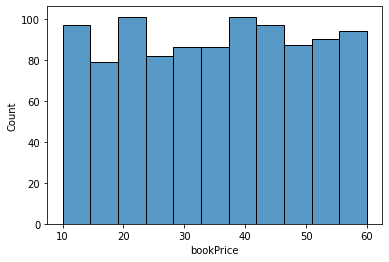

In [159]:
sns.histplot(df['bookPrice'])

<AxesSubplot:xlabel='bookAvialability', ylabel='Count'>

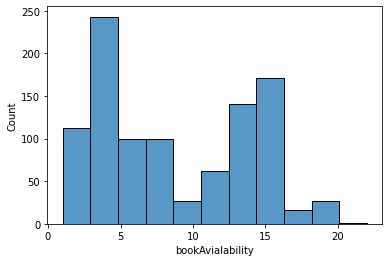

In [160]:
sns.histplot(df['bookAvialability'])

C:\Users\rutuj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bookrating', ylabel='count'>

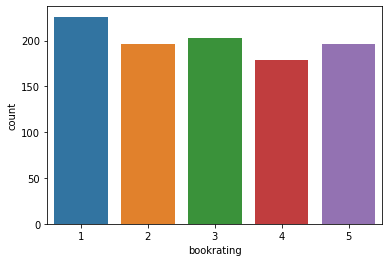

In [161]:
sns.countplot(df['bookrating'])

<AxesSubplot:xlabel='bookGenre', ylabel='count'>

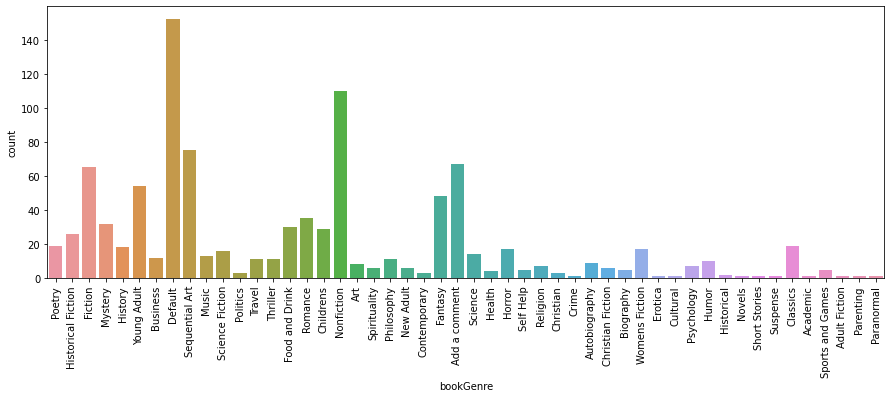

In [169]:
plt.figure(figsize=[15,5])
plt.xticks(rotation = 90)
sns.countplot(data = df,x='bookGenre')

In [185]:
df.iloc[df['bookPrice'].nlargest(10).index]

,bookName,bookGenre,bookPrice,bookAvialability,bookrating
648,The Perfect Play (Play by Play #1),Romance,59.99,4,3
617,Last One Home (New Beginnings #1),Fiction,59.98,5,3
860,Civilization and Its Discontents,Psychology,59.95,3,2
560,The Barefoot Contessa Cookbook,Food and Drink,59.92,6,5
366,The Diary of a Young Girl,Nonfiction,59.90,12,3
657,The Bone Hunters (Lexy Vaughan & Steven Macaul...,Thriller,59.71,4,3
133,Thomas Jefferson and the Tripoli Pirates: The ...,History,59.64,15,1
387,Boar Island (Anna Pigeon #19),Mystery,59.48,12,3
393,The Improbability of Love,Fiction,59.45,11,1
549,The Man Who Mistook His Wife for a Hat and Oth...,Nonfiction,59.45,6,4


In [191]:
df.iloc[df['bookrating'].nlargest(10).index]

,bookName,bookGenre,bookPrice,bookAvialability,bookrating
4,Sapiens: A Brief History of Humankind,History,54.23,20,5
12,Set Me Free,Young Adult,17.46,19,5
13,Scott Pilgrim's Precious Little Life (Scott Pi...,Sequential Art,52.29,19,5
14,Rip it Up and Start Again,Music,35.02,19,5
23,Chase Me (Paris Nights #2),Romance,25.27,19,5
24,Black Dust,Romance,34.53,19,5
28,Worlds Elsewhere: Journeys Around Shakespeareâ...,Nonfiction,40.30,18,5
30,The Four Agreements: A Practical Guide to Pers...,Spirituality,17.66,18,5
32,The Elephant Tree,Thriller,23.82,18,5
34,Sophie's World,Philosophy,15.94,18,5


In [195]:
df.iloc[df['bookAvialability'].nlargest().index]

,bookName,bookGenre,bookPrice,bookAvialability,bookrating
0,A Light in the Attic,Poetry,51.77,22,3
1,Tipping the Velvet,Historical Fiction,53.74,20,1
2,Soumission,Fiction,50.10,20,1
3,Sharp Objects,Mystery,47.82,20,4
4,Sapiens: A Brief History of Humankind,History,54.23,20,5


In [214]:
df.groupby('')
df.head()

,bookName,bookGenre,bookPrice,bookAvialability,bookrating
0,A Light in the Attic,Poetry,51.77,22,3
1,Tipping the Velvet,Historical Fiction,53.74,20,1
2,Soumission,Fiction,50.10,20,1
3,Sharp Objects,Mystery,47.82,20,4
4,Sapiens: A Brief History of Humankind,History,54.23,20,5


In [218]:
df.groupby(['bookGenre'])['bookrating'].max()

bookGenre
Academic              2
Add a comment         5
Adult Fiction         5
Art                   5
Autobiography         5
Biography             3
Business              5
Childrens             5
Christian             5
Christian Fiction     5
Classics              4
Contemporary          5
Crime                 1
Cultural              1
Default               5
Erotica               5
Fantasy               5
Fiction               5
Food and Drink        5
Health                5
Historical            5
Historical Fiction    5
History               5
Horror                5
Humor                 5
Music                 5
Mystery               5
New Adult             5
Nonfiction            5
Novels                5
Paranormal            1
Parenting             2
Philosophy            5
Poetry                5
Politics              4
Psychology            3
Religion              5
Romance               5
Science               5
Science Fiction       5
Self Help             5
Sequen